In [13]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup as BS
import matplotlib.pyplot as plt

In [2]:
# Question: 1 Extracting Tesla stock data using yfinance

tesla=yf.Ticker("TSLA")
tesla_data=tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [3]:
# Question: 2 Extracting Tesla Revenue Data using Webscraping

# Load the HTML content from the URL
url="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {"User-Agent": "Mozilla/5.0"}

# Send HTTP request and parse HTML
response=requests.get(url,headers=headers)
soup=BS(response.text,"html.parser")
soup


<!DOCTYPE html>

<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<link href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" rel="canonical"/>
<link href="https://m.macrotrends.net/stocks/charts/TSLA/tesla/revenue" media="only screen and (max-width: 768px)" rel="alternate"/>
<title>Tesla Revenue 2010-2025 | TSLA | MacroTrends</title>
<link href="/assets/images/icons/FAVICON/macrotrends-favicon-96.png" rel="icon" type="image/x-icon"/>
<meta content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2025. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Reve

In [4]:
# Find all the tables
tables=soup.find_all("table")

In [5]:
# Extract Tesla revenue table
revenue_data_tesla=[]

for table in tables:
    if "Tesla Annual Revenue" in table.text:
        rows = table.find_all("tr")[1:]  # Skip header
        for row in rows:
            cols = row.find_all("td")
            if len(cols) == 2:
                date = cols[0].text.strip()
                revenue = cols[1].text.strip().replace("$", "").replace(",", "")
                try:
                    revenue_data_tesla.append([date, float(revenue)])
                except ValueError:
                    continue

# Convert to DataFrame
tesla_revenue = pd.DataFrame(revenue_data_tesla, columns=["Date", "Revenue"])
tesla_revenue = tesla_revenue.sort_values("Date")
# Display the DataFrame
print("Tesla Annual Revenue")
tesla_revenue

Tesla Annual Revenue


,Date,Revenue
15,2009,112.0
14,2010,117.0
13,2011,204.0
12,2012,413.0
11,2013,2013.0
10,2014,3198.0
9,2015,4046.0
8,2016,7000.0
7,2017,11759.0
6,2018,21461.0


In [6]:
# Question: 3 Extracting Tesla stock data using yfinance

gamestop=yf.Ticker("GME")
gamestop_data=gamestop.history(period="max")
gamestop_data.reset_index(inplace=True)
gamestop_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [7]:
# Question: 4 Extraction GameStop revenue data using webscraping

# URL of GameStop revenue data
url="https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

headers={"User-Agent": "Mozilla/5.0"}

# Send HTTP request and parse HTML
response=requests.get(url,headers=headers)
soup=BS(response.text, "html.parser")

In [8]:
# Extract gamestop revenue table
revenue_data_gamestop=[]
tables=soup.find_all("table")

for table in tables:
    if "GameStop Annual Revenue" in table.text:
        rows = table.find_all("tr")[1:]  # Skip header
        for row in rows:
            cols = row.find_all("td")
            if len(cols) == 2:
                date = cols[0].text.strip()
                revenue = cols[1].text.strip().replace("$", "").replace(",", "")
                revenue_data_gamestop.append([date, revenue])
                try:
                    revenue_data_gamestop.append([date, float(revenue)])
                except ValueError:
                    continue

# Convert to DataFrame
gamestop_revenue = pd.DataFrame(revenue_data_gamestop, columns=["Date", "Revenue"])
gamestop_revenue=gamestop_revenue.sort_values("Date")
# Display the result
print("GameStop Annual Revenue")
print(gamestop_revenue)

GameStop Annual Revenue
    Date Revenue
33  2009  8806.0
32  2009    8806
30  2010    9078
31  2010  9078.0
29  2011  9474.0
28  2011    9474
27  2012  9551.0
26  2012    9551
25  2013  8887.0
24  2013    8887
23  2014  9040.0
22  2014    9040
21  2015  9296.0
20  2015    9296
19  2016  9364.0
18  2016    9364
17  2017  7965.0
16  2017    7965
14  2018    8547
15  2018  8547.0
13  2019  8285.0
12  2019    8285
11  2020  6466.0
10  2020    6466
9   2021  5090.0
8   2021    5090
7   2022  6011.0
6   2022    6011
5   2023  5927.0
4   2023    5927
3   2024  5273.0
2   2024    5273
1   2025  3823.0
0   2025    3823


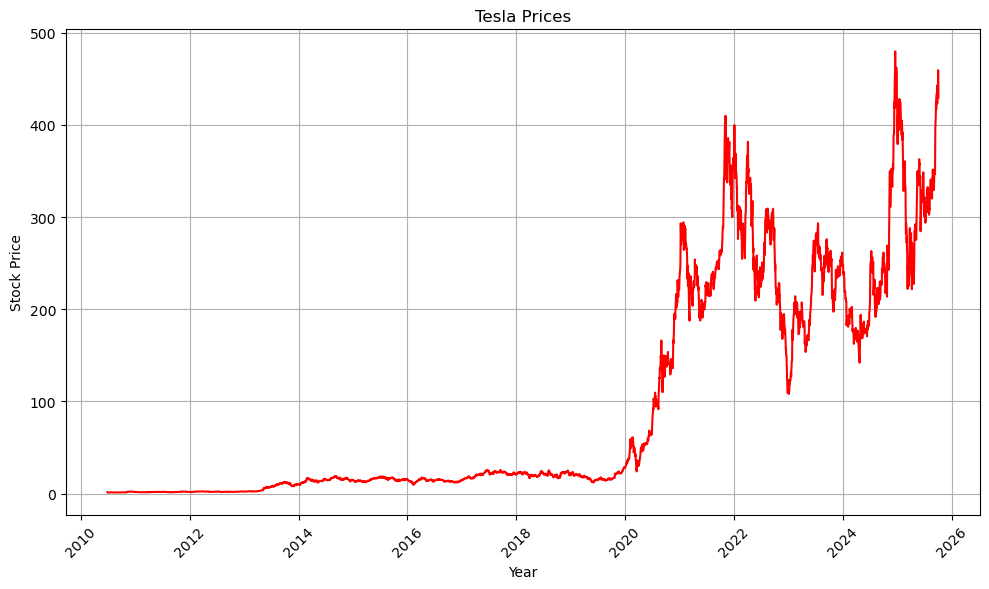

In [9]:
# Question 5 - Tesla Stock and Revenue Dashboard
plt.figure(figsize=(10,6))
plt.plot(tesla_data["Date"],tesla_data["Close"],color="red")
plt.title("Tesla Prices")
plt.xlabel("Year")
plt.ylabel("Stock Price")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

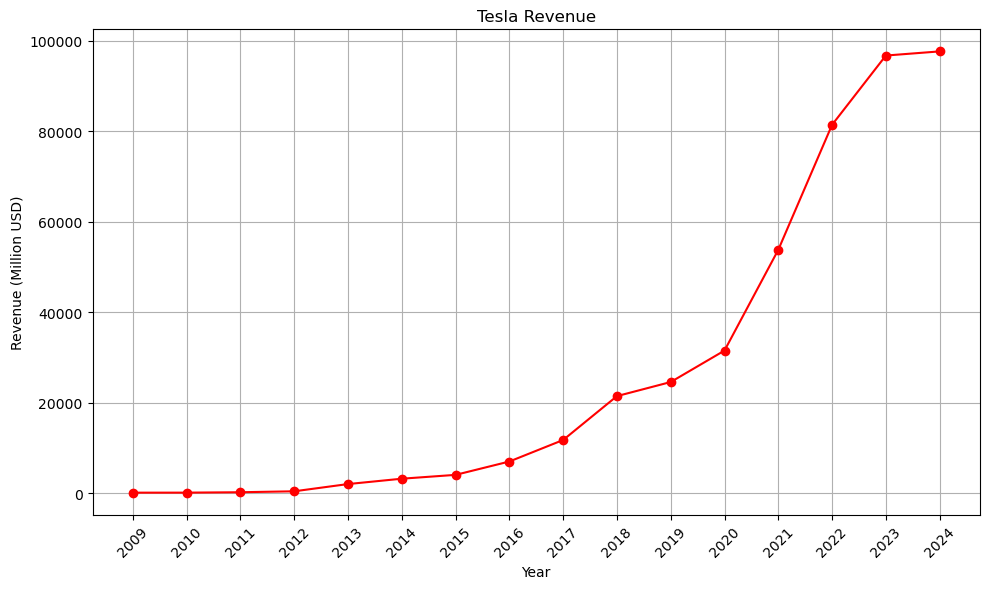

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(tesla_revenue["Date"],tesla_revenue["Revenue"], marker='o', linestyle='-', color='red')
plt.title("Tesla Revenue")
plt.xlabel("Year")
plt.ylabel("Revenue (Million USD)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

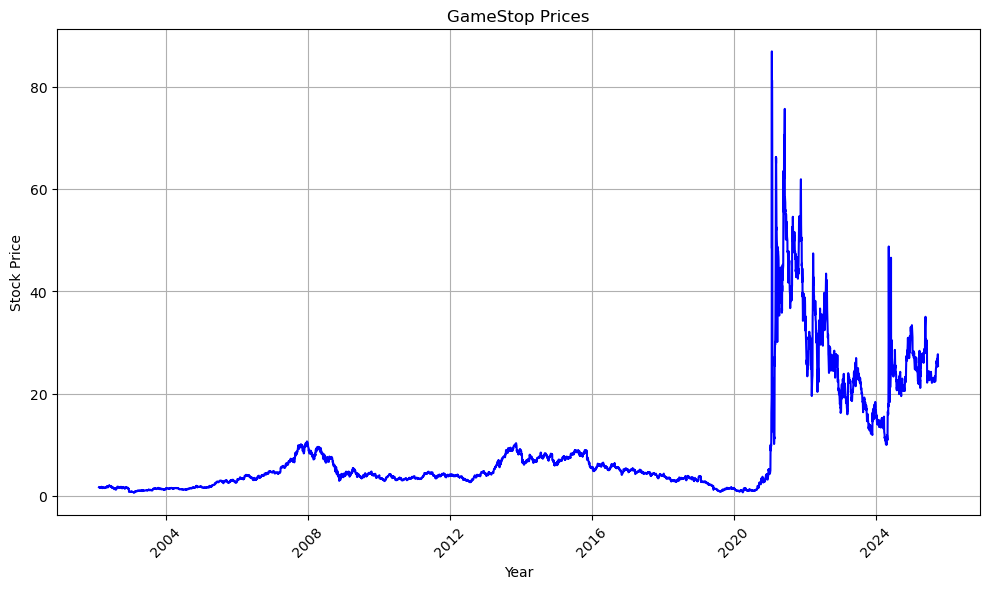

In [11]:
# Question 5 - GameStop Stock and Revenue Dashboard
plt.figure(figsize=(10,6))
plt.plot(gamestop_data["Date"],gamestop_data["Close"],color="blue")
plt.title("GameStop Prices")
plt.xlabel("Year")
plt.ylabel("Stock Price")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

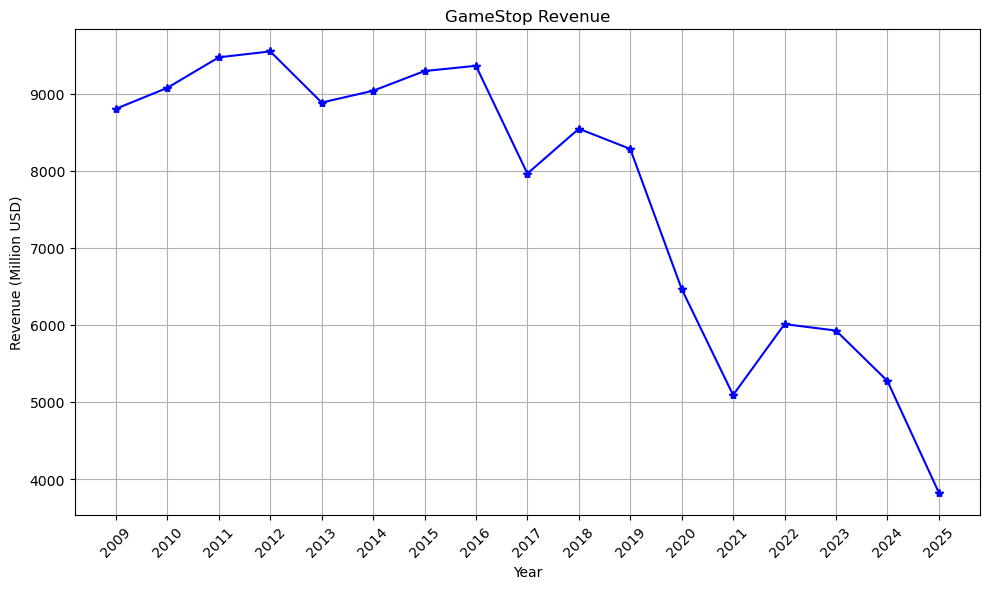

In [12]:
plt.figure(figsize=(10,6))
plt.plot(gamestop_revenue["Date"],gamestop_revenue["Revenue"],marker="*",linestyle="-",color="blue")
plt.title("GameStop Revenue")
plt.xlabel("Year")
plt.ylabel("Revenue (Million USD)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()